<a href="https://colab.research.google.com/github/QuimicaLi/MLBedu/blob/main/Sesi%C3%B3n1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import matplotlib.pyplot as plt


# Separación de datos

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
# Cargar el conjunto de datos Iris
data = load_iris()
X = data.data  # Características (atributos)
y = data.target  # Etiquetas (clases)

Haremos lo siguiente:

![image](https://github.com/beduExpert/C1-Machine-Learning-2020/raw/master/Sesion-02/imgassets/Partitions2.png)

In [3]:
# Dividir los datos en conjuntos de entrenamiento, validación y prueba
# Primero, dividimos en conjunto de entrenamiento y el resto (que luego se dividirá en validación y prueba)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Luego, dividimos el conjunto temporal (30%) en conjuntos de validación y prueba (50% cada uno)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [5]:
# Ahora tienes los siguientes conjuntos de datos:
# - X_train: Características de entrenamiento
# - y_train: Etiquetas de entrenamiento
# - X_val: Características de validación
# - y_val: Etiquetas de validación
# - X_test: Características de prueba
# - y_test: Etiquetas de prueba

# Puedes imprimir las longitudes de los conjuntos de datos para verificar
print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de validación:", len(X_val))
print("Tamaño del conjunto de prueba:", len(X_test))

Tamaño del conjunto de entrenamiento: 105
Tamaño del conjunto de validación: 22
Tamaño del conjunto de prueba: 23


#Validación cruzada


In [6]:
from sklearn.model_selection import KFold

In [7]:
# Generar datos de ejemplo (100 muestras)
X = np.random.rand(100,5) # caracteristicas
y = np.random.randint(2, size=100) # etiquetas binarias (0 o 1)

In [8]:
# Definir el número de pliegues para la validación cruzada
num_pliegues = 5

In [9]:
# Crear un objeto KFold para dividir los datos en pliegues
kf = KFold(n_splits=num_pliegues, shuffle=True, random_state=42)

In [10]:
# Realizar validación cruzada
for i, (train_indices, test_indices) in enumerate(kf.split(X)):
  X_entrenamiento, X_prueba = X[train_indices], X[test_indices]
  y_entrenamiento, y_prueba = y[train_indices], y[test_indices]

  # Imprimir información sobre el pliegue actuaal
  print(f"Pliegue {i + 1}:")
  print(f"Tamaño del conjunto de entrenamiento: {len(X_entrenamiento)}")
  print(f"Tamaño del conjunto de prueba: {len(X_prueba)}")
  print("\n")

Pliegue 1:
Tamaño del conjunto de entrenamiento: 80
Tamaño del conjunto de prueba: 20


Pliegue 2:
Tamaño del conjunto de entrenamiento: 80
Tamaño del conjunto de prueba: 20


Pliegue 3:
Tamaño del conjunto de entrenamiento: 80
Tamaño del conjunto de prueba: 20


Pliegue 4:
Tamaño del conjunto de entrenamiento: 80
Tamaño del conjunto de prueba: 20


Pliegue 5:
Tamaño del conjunto de entrenamiento: 80
Tamaño del conjunto de prueba: 20




En este ejemplo, se utiliza KFold para dividir manualmente los datos en pliegues y obtener conjuntos de entrenamiento y prueba en cada iteración de la validación cruzada.

En este código:

Generamos datos de ejemplo con 100 muestras y 5 características.

Definimos el número de pliegues para la validación cruzada (en este caso, 5 pliegues).

Utilizamos el objeto KFold de Scikit-Learn para dividir los datos en pliegues. El argumento shuffle=True garantiza que los datos se mezclen antes de la división, y random_state hace que la división sea reproducible.

En cada iteración del bucle, obtenemos conjuntos de entrenamiento y prueba utilizando los índices generados por kf.split(). Luego, imprimimos información sobre la división de datos en cada pliegue.
Este ejemplo ilustra cómo realizar la separación de datos en conjuntos de entrenamiento y prueba utilizando validación cruzada sin enfocarnos en el entrenamiento de un modelo específico ni en la evaluación del mismo.


# Leave-out-out cross validation

In [11]:
# Generar datos de ejemplo (10 puntos de datos)
datos = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [12]:
# Inicializar una lista para almacenar los resultados de LOOCV
resultados_loocv = []

In [13]:
# Realizar LOOCV
for i in range(len(datos)):
    conjunto_entrenamiento = np.delete(datos, i)  # Dejar fuera un punto de datos
    punto_prueba = datos[i]  # Punto excluido para prueba
    resultados_loocv.append((conjunto_entrenamiento, punto_prueba))

In [14]:
# Imprimir resultados de LOOCV
for i, (conjunto_entrenamiento, punto_prueba) in enumerate(resultados_loocv):
    print(f"Iteración {i + 1}:")
    print(f"Conjunto de Entrenamiento: {conjunto_entrenamiento}")
    print(f"Punto de Prueba: {punto_prueba}")
    print("\n")

Iteración 1:
Conjunto de Entrenamiento: [ 2  3  4  5  6  7  8  9 10]
Punto de Prueba: 1


Iteración 2:
Conjunto de Entrenamiento: [ 1  3  4  5  6  7  8  9 10]
Punto de Prueba: 2


Iteración 3:
Conjunto de Entrenamiento: [ 1  2  4  5  6  7  8  9 10]
Punto de Prueba: 3


Iteración 4:
Conjunto de Entrenamiento: [ 1  2  3  5  6  7  8  9 10]
Punto de Prueba: 4


Iteración 5:
Conjunto de Entrenamiento: [ 1  2  3  4  6  7  8  9 10]
Punto de Prueba: 5


Iteración 6:
Conjunto de Entrenamiento: [ 1  2  3  4  5  7  8  9 10]
Punto de Prueba: 6


Iteración 7:
Conjunto de Entrenamiento: [ 1  2  3  4  5  6  8  9 10]
Punto de Prueba: 7


Iteración 8:
Conjunto de Entrenamiento: [ 1  2  3  4  5  6  7  9 10]
Punto de Prueba: 8


Iteración 9:
Conjunto de Entrenamiento: [ 1  2  3  4  5  6  7  8 10]
Punto de Prueba: 9


Iteración 10:
Conjunto de Entrenamiento: [1 2 3 4 5 6 7 8 9]
Punto de Prueba: 10




Generamos un conjunto de datos de ejemplo con 10 puntos (puedes reemplazarlo por tus datos reales).

Realizamos LOOCV manualmente en un bucle for. En cada iteración, dejamos un punto de datos fuera como conjunto de prueba (punto_prueba) y usamos los demás como conjunto de entrenamiento (conjunto_entrenamiento).

Almacenamos los resultados de cada iteración en una lista llamada resultados_loocv, que contiene tuplas con los conjuntos de entrenamiento y los puntos de prueba.

Finalmente, imprimimos la información sobre los conjuntos de entrenamiento y los puntos de prueba en cada iteración.

Este ejemplo ilustra cómo implementar LOOCV sin un modelo, enfocándonos únicamente en la separación de datos.

# Matriz de confusión

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
# Generar datos de ejemplo (etiquetas reales y predicciones)
etiquetas_reales = np.array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1])  # Etiquetas reales (0 o 1)
predicciones = np.array([0, 1, 0, 0, 1, 1, 0, 0, 1, 1])  # Predicciones (0 o 1)

In [18]:
# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(etiquetas_reales, predicciones)

In [19]:
# Crear una figura para mostrar la matriz de confusión
plt.figure(figsize=(6, 4))

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

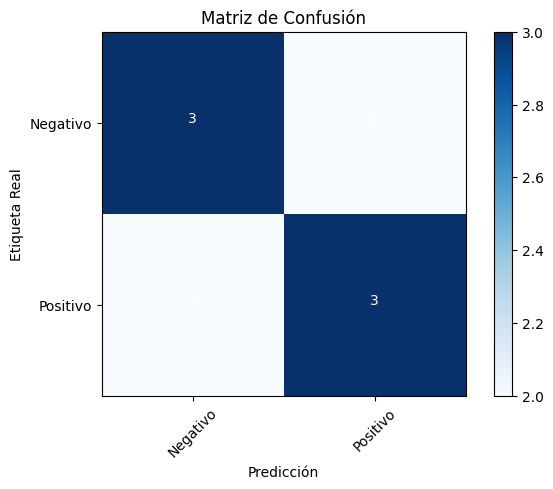

In [20]:
# Mostrar la matriz de confusión como una imagen
plt.imshow(matriz_confusion, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()

# Etiquetas de los ejes
clases = ["Negativo", "Positivo"]
tick_marks = np.arange(len(clases))
plt.xticks(tick_marks, clases, rotation=45)
plt.yticks(tick_marks, clases)

# Anotar los valores en la matriz de confusión
thresh = matriz_confusion.max() / 2.
for i in range(matriz_confusion.shape[0]):
    for j in range(matriz_confusion.shape[1]):
        plt.text(j, i, str(matriz_confusion[i, j]), horizontalalignment="center",
                 color="white" if matriz_confusion[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Etiqueta Real')
plt.xlabel('Predicción')
plt.show()

# Matriz de confusión

In [21]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, mean_squared_error, r2_score

In [22]:
# Generar datos de ejemplo (etiquetas reales y predicciones ficticias)
etiquetas_reales = np.array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1])  # Etiquetas reales (0 o 1)
predicciones = np.array([0, 1, 0, 0, 1, 1, 0, 0, 1, 1])  # Predicciones (0 o 1)


In [23]:
# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(etiquetas_reales, predicciones)

In [24]:
# Calcular precisión, sensibilidad y especificidad
precision = matriz_confusion[1, 1] / (matriz_confusion[1, 1] + matriz_confusion[0, 1])
sensibilidad = matriz_confusion[1, 1] / (matriz_confusion[1, 1] + matriz_confusion[1, 0])
especificidad = matriz_confusion[0, 0] / (matriz_confusion[0, 0] + matriz_confusion[0, 1])

In [25]:
# Calcular F1-score
f1_score = 2 * (precision * sensibilidad) / (precision + sensibilidad)

In [26]:
# Generar datos para la curva ROC y calcular el AUC-ROC
y_true = etiquetas_reales
y_scores = np.random.rand(len(y_true))
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

In [27]:
# Calcular el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R²)
y_true_regresion = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # Datos reales de regresión
y_pred_regresion = np.array([1.2, 2.5, 3.1, 3.9, 4.8, 6.0, 6.8, 7.9, 9.2, 10.5])  # Predicciones de regresión
mse = mean_squared_error(y_true_regresion, y_pred_regresion)
r2 = r2_score(y_true_regresion, y_pred_regresion)

In [28]:
# Imprimir las métricas calculadas
print(f"Precisión: {precision:.2f}")
print(f"Sensibilidad: {sensibilidad:.2f}")
print(f"Especificidad: {especificidad:.2f}")
print(f"F1-score: {f1_score:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")

Precisión: 0.60
Sensibilidad: 0.60
Especificidad: 0.60
F1-score: 0.60
AUC-ROC: 0.40
Error Cuadrático Medio (MSE): 0.07
Coeficiente de Determinación (R²): 0.99


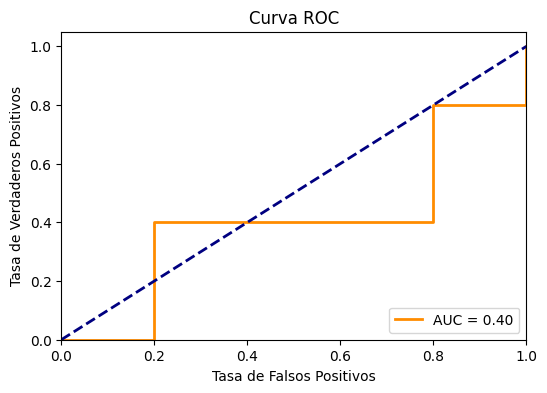

In [29]:
# Crear una figura para mostrar la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()